In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading CO2 emissions data

file_path = '../../data/raw/tidy_format_co2_emission_dataset.csv'
df = pd.read_csv(file_path)
df.sample(7)

,Country,Year,CO2EmissionRate (mt)
2854,Georgia,2003,0.9
2404,Belgium,2001,11.3
4721,Portugal,2012,4.4
5333,Seychelles,2015,9.5
45,Cyprus,2021,6.75
19,Bermuda,2021,0.82
3820,Colombia,2008,1.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               5572 non-null   object
 1   Year                  5572 non-null   int64 
 2   CO2EmissionRate (mt)  5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [5]:
# Emission rate needs to be converted from string to numeric and '-' entries will be converted to NaN

def co2_to_float(value):
    try:
        return float(value)
    except:
        return None
    
df['CO2EmissionRate'] = df['CO2EmissionRate (mt)'].apply(co2_to_float)
df.sample(7)

,Country,Year,CO2EmissionRate (mt),CO2EmissionRate
1452,Ethiopia,1996,0.1,0.1
2315,Netherlands,2000,10.4,10.4
5228,El Salvador,2015,1.2,1.2
2289,Kyrgyzstan,2000,0.9,0.9
5396,Botswana,2018,3.2,3.2
1618,Brunei,1997,18.7,18.7
769,Sweden,1992,6.6,6.6


In [6]:
# Drop null entries and select numeric CO2 emissions column

df = df.dropna()
selected_columns = ['Country', 'Year', 'CO2EmissionRate']
df = df[selected_columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          5445 non-null   object 
 1   Year             5445 non-null   int64  
 2   CO2EmissionRate  5445 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 170.2+ KB


In [8]:
# Looking into the trend to audit the values

trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990      805.100
1991      820.600
1992      964.300
1993      975.500
1994      971.100
1995      969.100
1996      964.200
1997      970.300
1998      961.400
1999      943.800
2000      983.100
2001      971.700
2002      967.000
2003     1002.900
2004     1025.300
2005     1042.100
2006     1041.500
2007     1060.200
2008     1044.200
2009      988.100
2010      962.300
2011      956.400
2012      935.100
2013      919.400
2014      917.000
2015     1026.700
2018     1056.000
2021    13821.252
Name: CO2EmissionRate, dtype: float64

In [9]:
avg_trend = df.groupby('Year')['CO2EmissionRate'].mean()
avg_trend

Year
1990     4.548588
1991     4.610112
1992     4.894924
1993     4.951777
1994     4.904545
1995     4.869849
1996     4.869697
1997     4.900505
1998     4.855556
1999     4.766667
2000     4.940201
2001     4.882915
2002     4.859296
2003     5.039698
2004     5.152261
2005     5.236683
2006     5.233668
2007     5.327638
2008     5.382474
2009     5.146354
2010     5.145989
2011     5.114439
2012     4.973936
2013     4.890426
2014     4.903743
2015     5.159296
2018     5.306533
2021    71.243567
Name: CO2EmissionRate, dtype: float64

In [10]:
# To drop 2021 emissions as they are not consistent wtih rest of dataset

df = df[df['Year']<2021]

df

,Country,Year,CO2EmissionRate
199,Afghanistan,1990,0.2
200,Albania,1990,2.3
201,Algeria,1990,3.0
202,Angola,1990,0.4
203,Antigua and Barbuda,1990,4.9
...,...,...,...
5567,Venezuela,2018,3.7
5568,Vietnam,2018,2.8
5569,Yemen,2018,0.4
5570,Zambia,2018,0.3


In [11]:
trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990     805.1
1991     820.6
1992     964.3
1993     975.5
1994     971.1
1995     969.1
1996     964.2
1997     970.3
1998     961.4
1999     943.8
2000     983.1
2001     971.7
2002     967.0
2003    1002.9
2004    1025.3
2005    1042.1
2006    1041.5
2007    1060.2
2008    1044.2
2009     988.1
2010     962.3
2011     956.4
2012     935.1
2013     919.4
2014     917.0
2015    1026.7
2018    1056.0
Name: CO2EmissionRate, dtype: float64

In [12]:
avg_trend = df.groupby('Year')['CO2EmissionRate'].mean()
avg_trend

Year
1990    4.548588
1991    4.610112
1992    4.894924
1993    4.951777
1994    4.904545
1995    4.869849
1996    4.869697
1997    4.900505
1998    4.855556
1999    4.766667
2000    4.940201
2001    4.882915
2002    4.859296
2003    5.039698
2004    5.152261
2005    5.236683
2006    5.233668
2007    5.327638
2008    5.382474
2009    5.146354
2010    5.145989
2011    5.114439
2012    4.973936
2013    4.890426
2014    4.903743
2015    5.159296
2018    5.306533
Name: CO2EmissionRate, dtype: float64

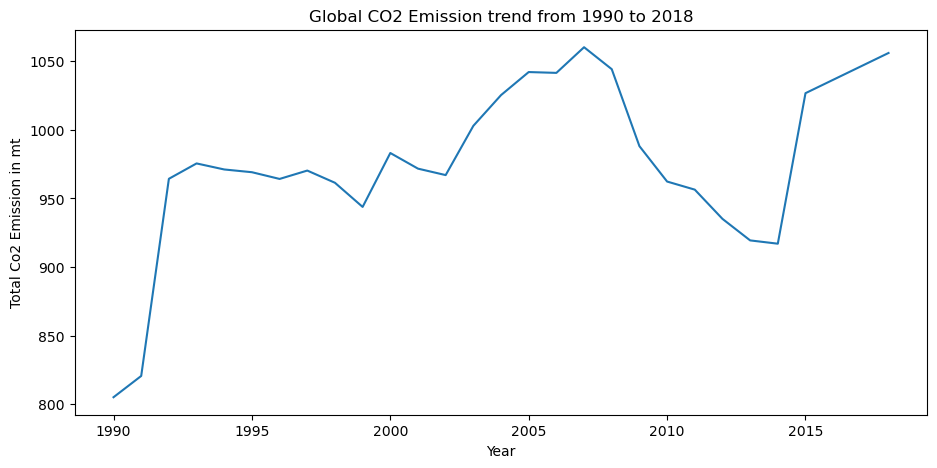

In [13]:
# Line plot to visualize trend

plt.figure(figsize=(11,5))
sns.lineplot(x=trend.index,y=trend.values)
plt.xticks(rotation=0)
plt.title('Global CO2 Emission trend from 1990 to 2018')
plt.xlabel('Year')
plt.ylabel('Total Co2 Emission in mt')
plt.show()

***Visualizations and insights from further detailed analysis of the data have been presented in the Visualizations.ipynb notebook.***

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5251.0,2003.080175,7.861967,1990.0,1996.0,2003.0,2010.0,2018.0
CO2EmissionRate,5251.0,4.997981,6.571756,0.0,0.7,2.7,7.2,65.8


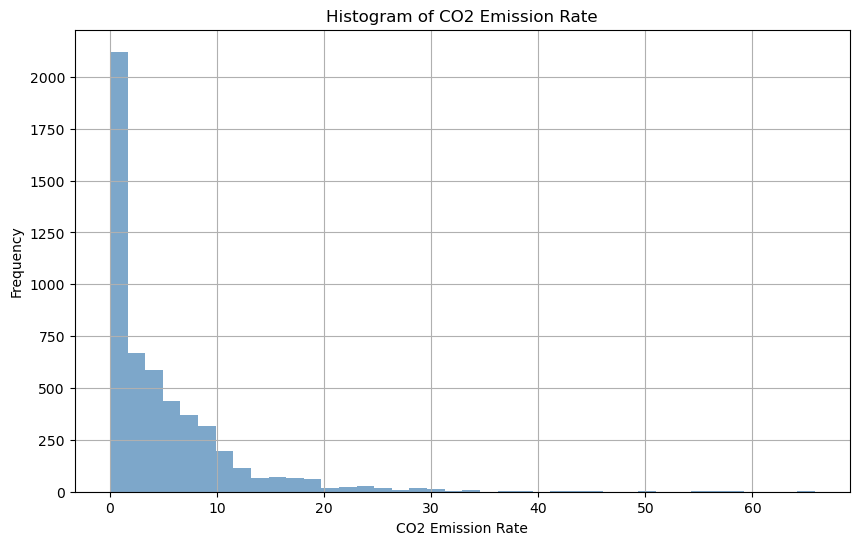

In [15]:
df['CO2EmissionRate'].hist(bins=40, figsize=(10, 6), color='steelblue', alpha=0.7)

plt.xlabel('CO2 Emission Rate')
plt.ylabel('Frequency')
plt.title('Histogram of CO2 Emission Rate')

plt.show()

In [16]:
# Log transformation applied to the skewed data

df = df[df['CO2EmissionRate']>0]
df.loc[:, 'CO2_Emissions_log'] = df['CO2EmissionRate'].apply(lambda x: np.log10(x))

selected_columns = ['Country', 'Year', 'CO2EmissionRate', 'CO2_Emissions_log']
df = df[selected_columns]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 199 to 5571
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5152 non-null   object 
 1   Year               5152 non-null   int64  
 2   CO2EmissionRate    5152 non-null   float64
 3   CO2_Emissions_log  5152 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 201.2+ KB


/var/folders/mk/01ggklcx2d7_5zgzbl9qk6h00000gn/T/ipykernel_11331/2077885445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'CO2_Emissions_log'] = df['CO2EmissionRate'].apply(lambda x: np.log10(x))


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5152.0,2003.109666,7.852245,1990.0,1996.000000,2003.000000,2010.000000,2018.000000
CO2EmissionRate,5152.0,5.094022,6.597629,0.1,0.700000,2.900000,7.300000,65.800000
CO2_Emissions_log,5152.0,0.325924,0.670364,-1.0,-0.154902,0.462398,0.863323,1.818226


In [18]:
df.duplicated().values.any()

False

In [19]:
# Saving processed data

file_path = '../../data/processed/clean_co2_emission_log_dataset.csv'
df.to_csv(file_path, index=False)

The features (latitude, longitude, and population data) needed to build a model are contained within separate datasets. 
 
So the relevant features will be extracted from the other datasets and merged into one final dataframe before modeling.

In [21]:
# Loading dataset to extract country latitudes and longitudes to be used as features

file_path = '../../data/raw/world_country_and_usa_states_latitude_and_longitude_values.csv'
df_ll = pd.read_csv(file_path)
df_ll.sample(7)

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
66,FI,61.924110,25.748151,Finland,NaN,NaN,NaN,NaN
195,SH,-24.143474,-10.030696,Saint Helena,NaN,NaN,NaN,NaN
17,BB,13.193887,-59.543198,Barbados,KY,37.839333,-84.270018,Kentucky
230,VA,41.902916,12.453389,Vatican City,NaN,NaN,NaN,NaN
143,MN,46.862496,103.846656,Mongolia,NaN,NaN,NaN,NaN
149,MT,35.937496,14.375416,Malta,NaN,NaN,NaN,NaN
181,PW,7.514980,134.582520,Palau,NaN,NaN,NaN,NaN


In [22]:
selected_columns = ['country', 'latitude', 'longitude']
df_ll = df_ll[selected_columns]

df_ll.sample(7)

,country,latitude,longitude
142,Myanmar [Burma],21.913965,95.956223
123,Laos,19.856270,102.495496
104,Iraq,33.223191,43.679291
11,American Samoa,-14.270972,-170.132217
25,Bermuda,32.321384,-64.757370
65,Ethiopia,9.145000,40.489673
231,Saint Vincent and the Grenadines,12.984305,-61.287228


In [23]:
df_ll.duplicated().values.any()

False

In [24]:
new_column_names = {'country':'Country',
                    'latitude':'Latitude',
                    'longitude':'Longitude'}
df_ll.rename(columns=new_column_names, inplace=True)

df_ll.sample(7)

,Country,Latitude,Longitude
172,Papua New Guinea,-6.314993,143.955550
76,French Guiana,3.933889,-53.125782
93,Heard Island and McDonald Islands,-53.081810,73.504158
141,Mali,17.570692,-3.996166
51,Cyprus,35.126413,33.429859
28,Brazil,-14.235004,-51.925280
235,Vietnam,14.058324,108.277199


In [25]:
# Saving extracted features before merging

file_path = '../../data/processed/clean_lat_long_dataset.csv'
df_ll.to_csv(file_path, index=False)

In [26]:
# Adding latitude and longitude to be used as features

df_merged_ll = pd.merge(df, df_ll, on='Country', how='left')
df_merged_ll.head()

,Country,Year,CO2EmissionRate,CO2_Emissions_log,Latitude,Longitude
0,Afghanistan,1990,0.2,-0.698970,33.939110,67.709953
1,Albania,1990,2.3,0.361728,41.153332,20.168331
2,Algeria,1990,3.0,0.477121,28.033886,1.659626
3,Angola,1990,0.4,-0.397940,-11.202692,17.873887
4,Antigua and Barbuda,1990,4.9,0.690196,17.060816,-61.796428


In [27]:
df_merged_ll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5152 non-null   object 
 1   Year               5152 non-null   int64  
 2   CO2EmissionRate    5152 non-null   float64
 3   CO2_Emissions_log  5152 non-null   float64
 4   Latitude           4996 non-null   float64
 5   Longitude          4996 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 281.8+ KB


In [28]:
# To check which countries have the null entries after merging

df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()

array(['Democratic Republic of the Congo', 'Eswatini', 'Falkland Islands',
       'Ivory Coast', 'Myanmar',
       'Saint Helena, Ascension and Tristan da Cunha', 'North Macedonia'],
      dtype=object)

In [29]:
# Using known alternate names to search for countries with missing entries

search = 'Congo|Swaziland|Malvinas|Ivoire|Malvinas|Burma|Helena|Macedonia'

missing_countries = df_ll[df_ll['Country'].str.contains(search, case=False, regex=True)]
missing_countries

,Country,Latitude,Longitude
37,Congo [DRC],-4.038333,21.758664
39,Congo [Republic],-0.228021,15.827659
41,Côte d'Ivoire,7.539989,-5.547080
68,Falkland Islands [Islas Malvinas],-51.796253,-59.523613
140,Macedonia [FYROM],41.608635,21.745275
142,Myanmar [Burma],21.913965,95.956223
195,Saint Helena,-24.143474,-10.030696
207,Swaziland,-26.522503,31.465866


In [30]:
# Create dictionary to map country names in needed format

country_mapping = {
    'Congo [DRC]': 'Democratic Republic of the Congo',
    'Côte d\'Ivoire': 'Ivory Coast',
    'Falkland Islands [Islas Malvinas]': 'Falkland Islands',
    'Macedonia [FYROM]': 'North Macedonia',
    'Myanmar [Burma]': 'Myanmar',
    'Saint Helena': 'Saint Helena, Ascension and Tristan da Cunha',
    'Swaziland': 'Eswatini'
}

# Update 'Country' column using the dictionary

missing_countries.loc[:,'Country'] = missing_countries['Country'].replace(country_mapping)
missing_countries

/var/folders/mk/01ggklcx2d7_5zgzbl9qk6h00000gn/T/ipykernel_11331/2909922633.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_countries.loc[:,'Country'] = missing_countries['Country'].replace(country_mapping)


,Country,Latitude,Longitude
37,Democratic Republic of the Congo,-4.038333,21.758664
39,Congo [Republic],-0.228021,15.827659
41,Ivory Coast,7.539989,-5.547080
68,Falkland Islands,-51.796253,-59.523613
140,North Macedonia,41.608635,21.745275
142,Myanmar,21.913965,95.956223
195,"Saint Helena, Ascension and Tristan da Cunha",-24.143474,-10.030696
207,Eswatini,-26.522503,31.465866


In [36]:
# Update the missing Latitude and Longitude values

for index, row in missing_countries.iterrows():
    country = row['Country']
    
    # Get the latitude and longitude values from 'missing_countries'
    country_latitude = missing_countries.loc[missing_countries['Country'] == country, 'Latitude'].values[0]
    country_longitude = missing_countries.loc[missing_countries['Country'] == country, 'Longitude'].values[0]
    
    # Update the 'Latitude' and 'Longitude' columns in 'df_merged_ll'
    df_merged_ll.loc[df_merged_ll['Country'] == country, 'Latitude'] = country_latitude
    df_merged_ll.loc[df_merged_ll['Country'] == country, 'Longitude'] = country_longitude

In [37]:
# Check to confirm no more null entries

df_merged_ll[df_merged_ll['Latitude'].isnull()]['Country'].unique()

array([], dtype=object)

In [38]:
df_merged_ll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 0 to 5151
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            5152 non-null   object 
 1   Year               5152 non-null   int64  
 2   CO2EmissionRate    5152 non-null   float64
 3   CO2_Emissions_log  5152 non-null   float64
 4   Latitude           5152 non-null   float64
 5   Longitude          5152 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 281.8+ KB


In [39]:
ordered_columns = ['Year', 'Country', 'Latitude', 'Longitude', 'CO2EmissionRate', 'CO2_Emissions_log']
df_merged_ll = df_merged_ll[ordered_columns]
df_merged_ll.head()

,Year,Country,Latitude,Longitude,CO2EmissionRate,CO2_Emissions_log
0,1990,Afghanistan,33.939110,67.709953,0.2,-0.698970
1,1990,Albania,41.153332,20.168331,2.3,0.361728
2,1990,Algeria,28.033886,1.659626,3.0,0.477121
3,1990,Angola,-11.202692,17.873887,0.4,-0.397940
4,1990,Antigua and Barbuda,17.060816,-61.796428,4.9,0.690196


In [40]:
# Saving dataset merged with latitude and longitude features

file_path = '../../data/processed/merged_lat_long_dataset.csv'
df_merged_ll.to_csv(file_path, index=False)

In [41]:
# Loading datasets to extract population and population density to be used as features

df_p = pd.read_csv('../../data/raw/population_total_long.csv')      # Population dataset
df_pd = pd.read_csv('../../data/raw/population_density_long.csv')   # Population_density dataset

In [42]:
df_p.sample(7)

,Country Name,Year,Count
11584,Guatemala,2013,15595821
2596,Andorra,1972,26892
9898,Nicaragua,2005,5438690
10272,Guatemala,2007,13700327
5958,Mexico,1987,79200081
439,Armenia,1962,2009526
11775,Djibouti,2014,898696


In [43]:
# Rename columns to match before merging
df_p = df_p.rename(columns={'Count': 'Population', 'Country Name': 'Country'}, inplace=False)

# Filter to match the years available in the CO2 emissions dataset
df_p = df_p[df_p['Year'] > 1989]    # CO2 emissions dataset starts at 1990

In [44]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6115 entries, 6480 to 12594
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     6115 non-null   object
 1   Year        6115 non-null   int64 
 2   Population  6115 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 191.1+ KB


In [45]:
df_pd.sample(7)

,Country Name,Year,Count
4402,Chile,1982,15
1269,Belarus,1967,43
7504,Tuvalu,1996,310
2116,Cote d'Ivoire,1971,16
83,Croatia,1961,74
2685,Tuvalu,1973,194
9021,United States,2003,31


In [46]:
# Rename columns to match before merging
df_pd = df_pd.rename(columns={'Count': 'Population_density', 'Country Name': 'Country'}, inplace=False)

# Filter to match the years available in the CO2 emissions dataset
df_pd = df_pd[df_pd['Year'] > 1989]    # CO2 emissions dataset starts at 1990

In [47]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 6032 to 12066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             6035 non-null   object
 1   Year                6035 non-null   int64 
 2   Population_density  6035 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 188.6+ KB


In [48]:
# Merge Population and Population_density on 'Country' and 'Year'

merged_df = df_p.merge(df_pd, on=['Country', 'Year'], how='inner')

In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6035 entries, 0 to 6034
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             6035 non-null   object
 1   Year                6035 non-null   int64 
 2   Population          6035 non-null   int64 
 3   Population_density  6035 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 235.7+ KB


In [50]:
# Merge all the features together into one dataframe

df_finale = df_merged_ll.merge(merged_df, on=['Country', 'Year'], how='left')

df_finale.sample(7)

,Year,Country,Latitude,Longitude,CO2EmissionRate,CO2_Emissions_log,Population,Population_density
1317,1997,Austria,47.516231,14.550072,7.7,0.886491,7968041.0,96.0
3536,2008,Hungary,47.162494,19.503304,5.5,0.740363,10038188.0,112.0
1448,1997,Peru,-9.189967,-75.015152,1.1,0.041393,25210954.0,19.0
731,1994,Antigua and Barbuda,17.060816,-61.796428,4.7,0.672098,67204.0,152.0
4291,2012,Japan,36.204824,138.252924,9.6,0.982271,127629000.0,350.0
3687,2009,Comoros,-11.875001,43.872219,0.2,-0.698970,673252.0,361.0
3566,2008,Malta,35.937496,14.375416,6.3,0.799341,409379.0,1279.0


In [51]:
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5152 entries, 0 to 5151
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                5152 non-null   int64  
 1   Country             5152 non-null   object 
 2   Latitude            5152 non-null   float64
 3   Longitude           5152 non-null   float64
 4   CO2EmissionRate     5152 non-null   float64
 5   CO2_Emissions_log   5152 non-null   float64
 6   Population          4180 non-null   float64
 7   Population_density  4180 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 362.2+ KB


In [54]:
# Using observed search term for countries with missing entries from inspection

search = ','

countries_missing = merged_df[merged_df['Country'].str.contains(search, case=False, regex=True)]
countries_missing

,Country,Year,Population,Population_density
19,"Bahamas, The",1990,256223,25
38,"Congo, Dem. Rep.",1990,34612023,15
39,"Congo, Rep.",1990,2356737,6
57,"Egypt, Arab Rep.",1990,56134475,56
72,"Gambia, The",1990,955593,94
...,...,...,...,...
5924,"Korea, Rep.",2017,51466201,527
5937,"Macao SAR, China",2017,622585,20479
5977,"Korea, Dem. People’s Rep.",2017,25429985,211
6024,"Venezuela, RB",2017,29390409,33


In [55]:
countries_missing['Country'].unique()

array(['Bahamas, The', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Egypt, Arab Rep.', 'Gambia, The', 'Hong Kong SAR, China',
       'Iran, Islamic Rep.', 'Korea, Rep.', 'Macao SAR, China',
       'Korea, Dem. People’s Rep.', 'Venezuela, RB', 'Yemen, Rep.',
       'Micronesia, Fed. Sts.'], dtype=object)

In [58]:
# # Create dictionary to map country names in required format

# country_map = {
#     'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
#     'Bahamas, The': 'Bahamas',
#     'Egypt, Arab Rep.': 'Egypt',
#     'Hong Kong SAR, China': 'Hong Kong',
#     'Iran, Islamic Rep.': 'Iran',
#     'Korea, Rep.': 'South Korea',
#     'Korea, Dem. People’s Rep.': 'North Korea',
#     'Macao SAR, China': 'Macau',
#     'Venezuela, RB': 'Venezuela',
#     'Yemen, Rep.': 'Yemen'
# }

# # Update 'Country' column using the dictionary
# countries_missing.loc[:,'Country'] = countries_missing['Country'].replace(country_map)
# countries_missing

In [57]:
# Create dictionary to map country names in required format
country_map = {
    'Congo, Dem. Rep.': 'Democratic Republic of the Congo',
    'Bahamas, The': 'Bahamas',
    'Egypt, Arab Rep.': 'Egypt',
    'Hong Kong SAR, China': 'Hong Kong',
    'Iran, Islamic Rep.': 'Iran',
    'Korea, Rep.': 'South Korea',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Macao SAR, China': 'Macau',
    'Venezuela, RB': 'Venezuela',
    'Yemen, Rep.': 'Yemen'
}

# Update names in 'Country' column using the dictionary
merged_df.loc[:,'Country'] = merged_df['Country'].replace(country_map)
merged_df.sample(7)

,Country,Year,Population,Population_density
5003,Cayman Islands,2013,59932,249
551,Malta,1992,367618,1148
659,Belize,1993,197622,8
3729,Guinea-Bissau,2007,1411543,50
6031,Yemen,2017,27834821,52
5160,Venezuela,2013,29783571,33
3370,Oman,2005,2511251,8


In [59]:
# Merge all the features together into one dataframe using updated population dataframe

df_finale = df_merged_ll.merge(merged_df, on=['Country', 'Year'], how='inner')
df_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4426 entries, 0 to 4425
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                4426 non-null   int64  
 1   Country             4426 non-null   object 
 2   Latitude            4426 non-null   float64
 3   Longitude           4426 non-null   float64
 4   CO2EmissionRate     4426 non-null   float64
 5   CO2_Emissions_log   4426 non-null   float64
 6   Population          4426 non-null   int64  
 7   Population_density  4426 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 311.2+ KB


In [60]:
# df_finale[df_finale['Population'].isnull()]['Country'].unique()

array([], dtype=object)

In [61]:
# Saving final merged dataset with full features

file_path = '../../data/processed/merged_full_features_dataset.csv'
df_finale.to_csv(file_path, index=False)